In [78]:
import pandas as pd
import numpy as np
import statistics
import math
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
from numpy import unique
def label_encoder (to , my_list):
    for i in range(0,to):
        lbl = LabelEncoder()
        lbl.fit(list(my_list[i].values))
        my_list[i] = lbl.transform(list(my_list[i].values))
    data["category 1"] = my_list[0]
    data["category 2"] = my_list[1]
    data["category 3"] = my_list[2]
    data["category 4"] = my_list[3]
        
def label_encoder2 (name) : 
    lbl = LabelEncoder()
    lbl.fit(list(data[name].values))
    data[name] = lbl.transform(list(data[name].values))
    
def featureScaling(X,a,b):
    X = np.array(X)
    Normalized_X = X
    for i in range(0,X.shape[1]):
        Normalized_X[:,i]=((X[:,i]-min(X[:,i]))/(max(X[:,i])-min(X[:,i])))*(b-a)+a
    return Normalized_X

data = pd.read_csv('AmazonProductClassification.csv')

data.dropna(axis = 0,how='all',inplace=True)
data.dropna(axis = 0,subset=['manufacturer'],inplace=True)
data['price']=pd.to_numeric(data['price'],errors='coerce')
data['price'].fillna(value = data['price'].mean(),inplace=True)
data.drop_duplicates(keep=False,inplace=True)

best = data['product_information'].str.extract(pat = '(Best Sellers Rank (\d+)\,(\d+))')

best[2] = pd.to_numeric(best[2], errors='coerce')
best[1] = pd.to_numeric(best[1], errors='coerce')
data['best sellers 1'] = best[1]
data['best sellers 2'] = best[2]
data['best sellers 1'].fillna(value = data['best sellers 1'].mean(),inplace=True)
data['best sellers 2'].fillna(value = data['best sellers 2'].mean(),inplace=True)
data = data[~data.ProductGrade.str.contains("Not Found")]

data['number_of_answered_questions'] = pd.to_numeric(data['number_of_answered_questions'], errors='coerce')
data['number_of_answered_questions'].fillna(value = 0,inplace=True)
data['number_of_answered_questions'] = pd.to_numeric(data['number_of_answered_questions'], downcast='integer')



data['number_of_reviews']=pd.to_numeric(data['number_of_reviews'], errors='coerce')
data['number_of_reviews'].fillna(value = 0,inplace=True)
data['number_of_reviews']=pd.to_numeric(data['number_of_reviews'], downcast='integer')

result = data['number_available_in_stock'].str.split('(\d+)([A-Za-z]+)', expand=True)
stock_new = np.zeros([8477, 1])
for idx, val in enumerate(result[2]):
    if val == 'new':
        stock_new[idx][0]= result.iloc[idx,1]
data['number_available_in_stock'] = stock_new

data['number_available_in_stock']=pd.to_numeric(data['number_available_in_stock'], errors='coerce', downcast='integer')

data['sellers']=data['sellers'].str.findall(r"[-+]?\d*\.\d+",flags= re.I)
data['sellers'].fillna(0,inplace=True)
avg = np.zeros([8477, 1])

avg_for_zeroes = 0
nm_avg_for_zeroes = 0
for i in range(0,len(data['sellers'])):
    if type(data.iloc[i,8]) != int:
        L = [float(n) for n in data.iloc[i,8]]
        if len(L) != 0 : 
            avg[i][0] = sum(L)/float(len(L))
            avg_for_zeroes = avg_for_zeroes + avg[i][0]
            nm_avg_for_zeroes = nm_avg_for_zeroes + 1
avg_for_zeroes = avg_for_zeroes / nm_avg_for_zeroes
for i in range(0,len(data['sellers'])):
    if type(data.iloc[i,8]) == int:
            avg[i][0] = avg_for_zeroes
data['sellers'] = avg

data['amazon_category_and_sub_category'].fillna(0,inplace=True)
new_data2 = data["amazon_category_and_sub_category"].str.split(">", n = 4 , expand = True)
new_data2.fillna(0,inplace=True)
label_encoder(5 ,new_data2)
data.drop("amazon_category_and_sub_category", axis=1,inplace=True)
data.drop("product_information", axis=1,inplace=True)
label_encoder2('manufacturer')
label_encoder2('ProductGrade')
label_encoder2('uniq_id')
label_encoder2('product_name')

data

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,sellers,ProductGrade,best sellers 1,best sellers 2,category 1,category 2,category 3,category 4
0,4153,8140,2249,26.99000,0,1,1,30.238981,0,436.0,316.0,38,85,108,43
1,7253,646,24,20.18511,4,1,1,51.382000,0,784.0,30.0,19,96,97,43
2,1301,28,40,2.28000,6,1,0,30.238981,3,172.0,97.0,14,2,62,43
3,118,8377,1529,10.00000,6,6,1,30.238981,1,53.0,547.0,0,162,108,43
4,1769,1367,296,20.18511,0,7,1,30.238981,1,128.0,961.0,14,38,2,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8500,2105,4767,1321,6.00000,5,4,1,19.485000,1,357.0,68.0,16,58,108,43
8501,1538,2335,561,12.99000,6,1,1,20.460000,3,219.0,845.0,0,162,108,43
8502,5379,5612,1533,5.99000,0,3,1,5.990000,2,70.0,500.0,1,30,16,43
8503,509,2726,1823,35.90000,3,4,1,15.353333,3,140.0,60.0,38,85,108,43


Index(['product_name', 'manufacturer', 'price', 'number_of_reviews',
       'number_of_answered_questions', 'sellers', 'ProductGrade',
       'best sellers 1', 'best sellers 2', 'category 1', 'category 2',
       'category 3', 'category 4'],
      dtype='object')
training0.673352012977437
testing0.6639150943396226
Mean Square Error testing 1.3189858490566038
Mean Square Error training 1.398908715528683


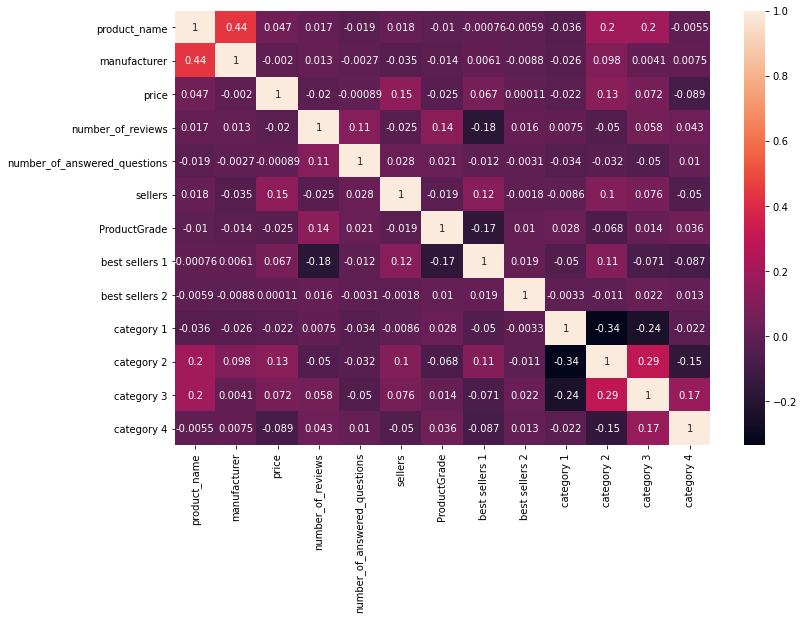

In [86]:
#best for poly if C is less or more than 50, MSE testing will increase 
corr = data.corr()
top_features = corr.index[abs(corr['ProductGrade'] )>  0.01]
plt.subplots(figsize=(12,8))
top_corr = data[top_features].corr()
sns.heatmap(top_corr,annot=True)
#plt.show()
print(top_features)
top_features = top_features.delete(6)
X = data[top_features]
Y = data['ProductGrade']
X = featureScaling(X, 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0)
C = 50  # SVM regularization parameter
svc = svm.SVC(kernel='poly', degree=4, C=C).fit(X_train, y_train)
predictions1 = svc.predict(X_train)
accuracy = np.mean(predictions1 == y_train)
print("training" + str(accuracy))
predictions2 = svc.predict(X_test)
accuracy = np.mean(predictions2 == y_test)
print("testing" + str(accuracy))
print('Mean Square Error testing', metrics.mean_squared_error(y_test, predictions2))
print('Mean Square Error training', metrics.mean_squared_error(y_train, predictions1))